In [1]:
import os
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import matplotlib.dates as mdate
import scipy.optimize as spo
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.tsa.stattools as sts
import seaborn as sns

In [2]:
data5=pd.read_csv('C:\\Users\\wuboyuan\\Desktop\\data5.csv',header=None)
data5=100*data5.apply(np.log).diff(1)[1:]
y=data5.T.values[0]
T=len(y)

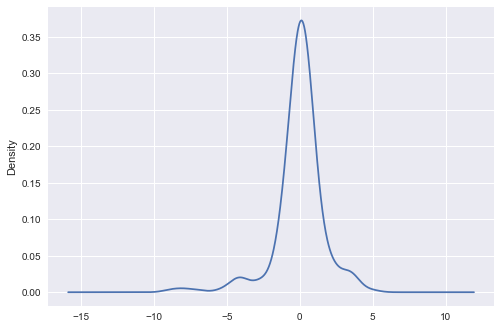

In [19]:
pd.DataFrame(y).plot.kde(label='mffbs',legend=False)
plt.show()

In [2]:
path1='C:\\Users\\wuboyuan\\Desktop\\kuoz'
name1=os.listdir(path1)

In [3]:
name1

['mffbs_h.csv',
 'mffbs_theta.csv',
 'sv2_h.csv',
 'sv2_theta.csv',
 'svma_h.csv',
 'svma_theta.csv',
 'svm_h.csv',
 'svm_theta.csv',
 'sv_h.csv',
 'sv_theta.csv']

In [6]:
file={}
data={}
key=[]
data0={}
fre={}
for i in range(len(name1)):
    file[i]=os.path.join(path1,name1[i])
    data[name1[i][0:-4]]=pd.read_csv(file[i],header=None)
    key.append(name1[i][0:-4])
    data0[key[i]]=data[key[i]]

0
1
2
3
4
5
6
7
8
9


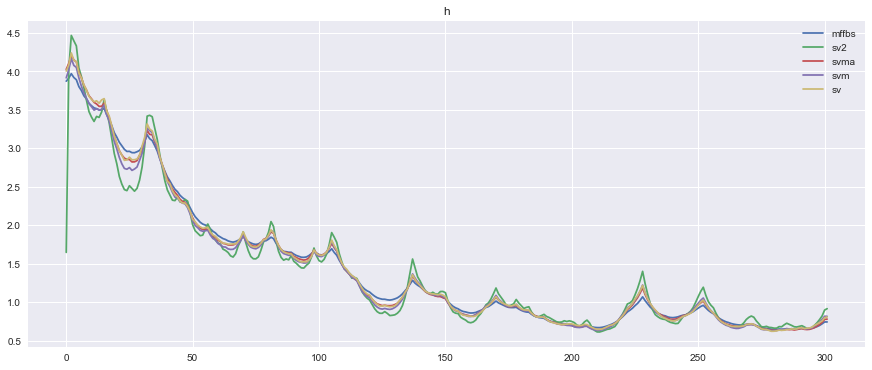

In [17]:
plt.figure(figsize=(15,6))
plt.plot(data0[key[0]][1:].mean(),label='mffbs')
plt.plot(np.exp(data0[key[2]][1:]).mean(),label='sv2')
plt.plot(np.exp(data0[key[4]][1:]).mean(),label='svma')
plt.plot(np.exp(data0[key[6]][1:]).mean(),label='svm')
plt.plot(np.exp(data0[key[8]][1:]).mean(),label='sv')
plt.title('h')
plt.legend()
plt.show()

In [47]:
data0[key[3]][1:][3].mean()

-0.06824587880463541

C:\Users\wuboyuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


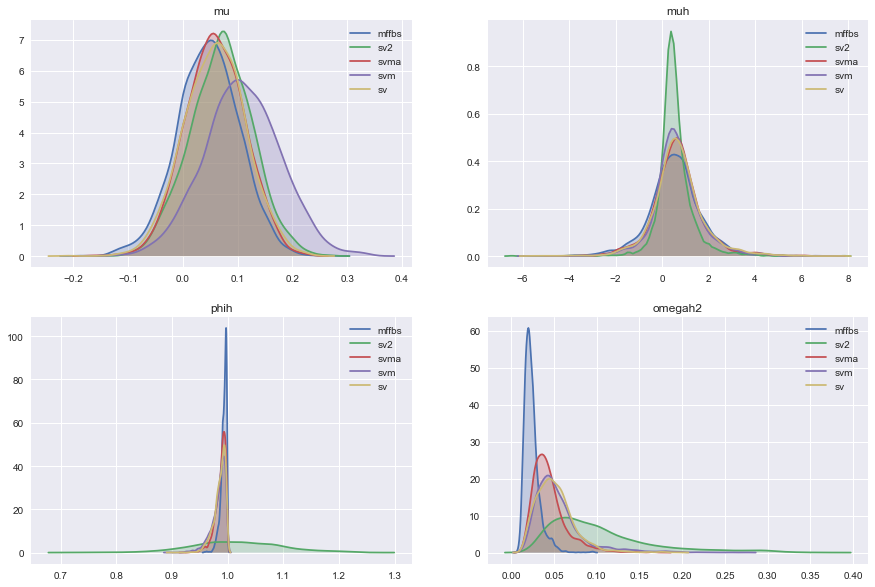

In [20]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(221)
sns.kdeplot(data0[key[1]][1:][0],shade=True,label='mffbs',ax=ax1)
sns.kdeplot(data0[key[3]][1:][0],shade=True,label='sv2',ax=ax1)
sns.kdeplot(data0[key[5]][1:][0],shade=True,label='svma',ax=ax1)
sns.kdeplot(data0[key[7]][1:][0],shade=True,label='svm',ax=ax1)
sns.kdeplot(data0[key[9]][1:][0],shade=True,label='sv',ax=ax1)
plt.title('mu')
ax2=plt.subplot(222)
sns.kdeplot(data0[key[1]][1:][1],shade=True,label='mffbs',ax=ax2)
sns.kdeplot(data0[key[3]][1:][1],shade=True,label='sv2',ax=ax2)
sns.kdeplot(data0[key[5]][1:][2],shade=True,label='svma',ax=ax2)
sns.kdeplot(data0[key[7]][1:][2],shade=True,label='svm',ax=ax2)
sns.kdeplot(data0[key[9]][1:][1],shade=True,label='sv',ax=ax2)
plt.title('muh')
ax3=plt.subplot(223)
sns.kdeplot(data0[key[1]][1:][2],shade=True,label='mffbs',ax=ax3)
sns.kdeplot(data0[key[3]][1:][2],shade=True,label='sv2',ax=ax3)
sns.kdeplot(data0[key[5]][1:][3],shade=True,label='svma',ax=ax3)
sns.kdeplot(data0[key[7]][1:][3],shade=True,label='svm',ax=ax3)
sns.kdeplot(data0[key[9]][1:][2],shade=True,label='sv',ax=ax3)
plt.title('phih')
ax4=plt.subplot(224)
sns.kdeplot(data0[key[1]][1:][3],shade=True,label='mffbs',ax=ax4)
sns.kdeplot(data0[key[3]][1:][4],shade=True,label='sv2',ax=ax4)
sns.kdeplot(data0[key[5]][1:][4],shade=True,label='svma',ax=ax4)
sns.kdeplot(data0[key[7]][1:][4],shade=True,label='svm',ax=ax4)
sns.kdeplot(data0[key[9]][1:][3],shade=True,label='sv',ax=ax4)
plt.title('omegah2')
plt.show()

C:\Users\wuboyuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


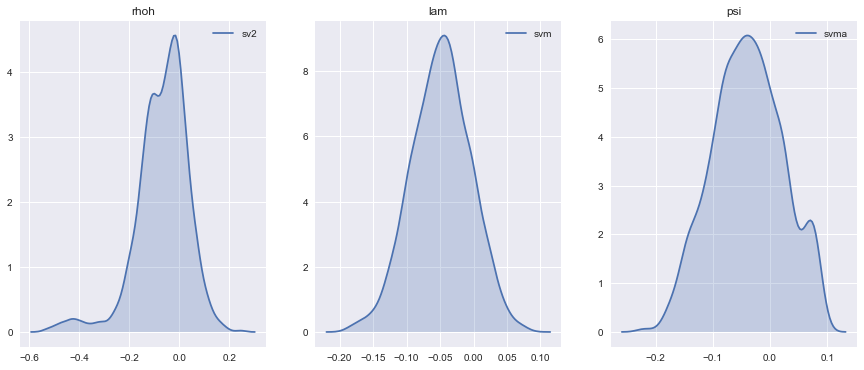

In [23]:
plt.figure(figsize=(15,6))
ax1=plt.subplot(131)

sns.kdeplot(data0[key[3]][1:][3],shade=True,label='sv2',ax=ax1)

plt.title('rhoh')
ax2=plt.subplot(132)

sns.kdeplot(data0[key[7]][1:][1],shade=True,label='svm',ax=ax2)

plt.title('lam')
ax3=plt.subplot(133)

sns.kdeplot(data0[key[5]][1:][1],shade=True,label='svma',ax=ax3)

plt.title('psi')
plt.show()

In [102]:
for i in range(len(data0[key[0]])):
    u=(np.matrix(y).T-data0[key[1]][0][i])/(data0[key[0]][i:i+1].T)
    rtmp=sts.acf(u,nlags=20)
    Q=T*(T+2)/(T-np.arange(21)[1:])*np.matrix(rtmp[1:]**2).T
    rtmp2=sts.acf(np.power(rtmp,2),nlags=20)
    Q2=T*(T+2)/(T-np.arange(21)[1:])*np.matrix(rtmp2[1:]**2).T
    store_q[i,:]=[float(Q),float(Q2)]

In [103]:
pd.DataFrame(store_q).mean()

0    17.313928
1     5.327302
dtype: float64

In [80]:
(np.matrix(y).T-data0[key[2]][0][i+1])/np.exp(data0[key[0]][i+1:i+2].T/2)

matrix([], shape=(302, 0), dtype=float64)

In [93]:
data0[key[3]]

,0,1,2,3,4
0,0.000000,1.000000,2.000000,3.000000,4.000000
1,0.011972,1.936774,0.952428,0.039663,0.062210
2,-0.029530,1.219166,0.952428,0.039663,0.055722
3,0.015221,-0.024803,0.952428,0.039663,0.060906
4,-0.030511,0.258987,0.952428,0.039663,0.064890
5,-0.026607,1.730241,0.952428,0.039663,0.068383
6,0.004287,0.484607,0.954470,-0.039713,0.066607
7,0.035608,0.616994,0.983718,-0.073482,0.084533
8,0.011144,0.387943,0.983718,-0.073482,0.070476
9,0.184460,0.704824,0.980773,-0.069553,0.066017


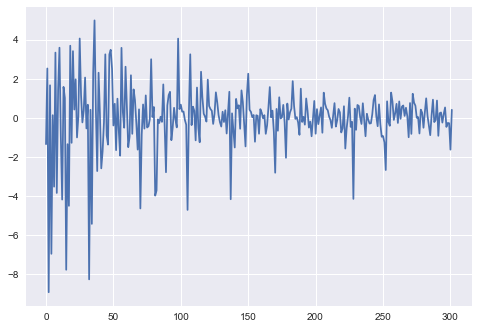

In [104]:
plt.plot(y)
plt.show()